In [15]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [3]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet

--2024-05-19 22:00:33--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 99.84.245.193, 99.84.245.157, 99.84.245.9, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|99.84.245.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1427002 (1.4M) [binary/octet-stream]
Saving to: ‘green_tripdata_2023-01.parquet’

green_tripdata_2023 100%[===================>]   1.36M  8.60MB/s    in 0.2s    

2024-05-19 22:00:34 (8.60 MB/s) - ‘green_tripdata_2023-01.parquet’ saved [1427002/1427002]



In [4]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet

--2024-05-19 22:00:47--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 99.84.245.193, 99.84.245.157, 99.84.245.9, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|99.84.245.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1533740 (1.5M) [binary/octet-stream]
Saving to: ‘green_tripdata_2023-02.parquet’

green_tripdata_2023 100%[===================>]   1.46M  9.47MB/s    in 0.2s    

2024-05-19 22:00:48 (9.47 MB/s) - ‘green_tripdata_2023-02.parquet’ saved [1533740/1533740]



In [6]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet

--2024-05-19 22:03:57--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 99.84.245.193, 99.84.245.157, 99.84.245.141, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|99.84.245.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47673370 (45M) [application/x-www-form-urlencoded]
Saving to: ‘yellow_tripdata_2023-01.parquet’

yellow_tripdata_202 100%[===================>]  45.46M   127MB/s    in 0.4s    

2024-05-19 22:03:58 (127 MB/s) - ‘yellow_tripdata_2023-01.parquet’ saved [47673370/47673370]



In [7]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet

--2024-05-19 22:04:18--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 99.84.245.193, 99.84.245.157, 99.84.245.141, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|99.84.245.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47748012 (46M) [application/x-www-form-urlencoded]
Saving to: ‘yellow_tripdata_2023-02.parquet’

yellow_tripdata_202 100%[===================>]  45.54M  94.4MB/s    in 0.5s    

2024-05-19 22:04:19 (94.4 MB/s) - ‘yellow_tripdata_2023-02.parquet’ saved [47748012/47748012]



In [23]:
# read the parquet files in the data folder
df = pd.read_parquet('/content/yellow_tripdata_2023-01.parquet')

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [24]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [25]:
# prompt: calculate a new column duration in mins

df['duration_mins'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration_mins
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [21]:
# df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
# df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

# df = df[(df.duration >= 1) & (df.duration <= 60)]

# categorical = ['PULocationID', 'DOLocationID']
# numerical = ['trip_distance']

# df[categorical] = df[categorical].astype(str)

In [26]:
# prompt:  standard deviation of the duration column
print(df['duration_mins'].std())


42.59435124195458


<Axes: >

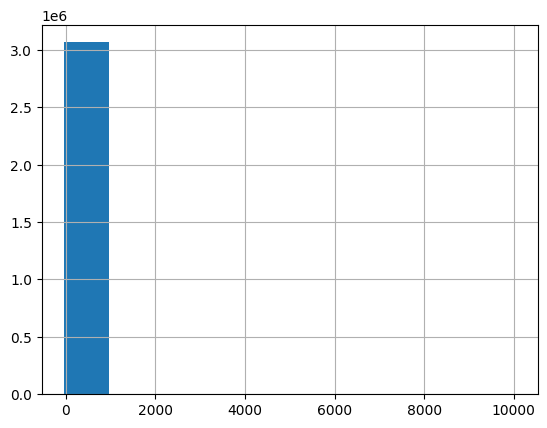

In [31]:
# distribution of column duration mins

df['duration_mins'].hist()

In [37]:
filtered_df = df[df['duration_mins'].between(1, 60)]

# Calculate the fraction of records left after dropping outliers
fraction_left = len(filtered_df) / len(df)

print(f"Fraction of records left after dropping outliers: {fraction_left:.2%}")

Fraction of records left after dropping outliers: 100.00%


In [40]:
data = df[['PULocationID', 'DOLocationID']].astype(str).to_dict('records')

dv = DictVectorizer()
X = dv.fit_transform(data)

dimensionality = X.shape[1]
print(f"The dimensionality of the feature matrix is: {dimensionality}")

The dimensionality of the feature matrix is: 515


In [45]:
y = df['duration_mins']

In [46]:
# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Calculate the RMSE on the training data
y_pred = model.predict(X)
rmse_train = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE on the training data: {rmse_train:.2f}")

RMSE on the training data: 7.65


In [56]:
import pickle

In [57]:
with open('model.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out)

In [59]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)

    return df

In [61]:
df_val = read_dataframe('/content/green_tripdata_2023-02.parquet')

In [62]:
df_train = read_dataframe('/content/green_tripdata_2023-01.parquet')

In [63]:
len(df_train), len(df_val)

(65946, 62574)

In [64]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [65]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [66]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [67]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

6.0345051170522

In [70]:
with open('lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [71]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

8.231436941224935